In [1]:
from datetime import datetime
from MetaTrader5 import *
MT5Initialize()
MT5WaitForTerminal()

print(MT5TerminalInfo())
print(MT5Version())

[2, 'MetaQuotes-Demo', '21592194']
[500, 2233, '28 Nov 2019']


In [2]:
rates = MT5CopyRatesRange("EURUSD", MT5_TIMEFRAME_D1, datetime(2000,1,1), datetime(2019,11,21))

In [3]:
import pandas as pd
d = pd.DataFrame(list(rates),
                           columns=['time', 'open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume'])

In [4]:
d['median']=(d['high']+d['low'])/2

In [5]:
d['delta'] = d['high'].diff(1).fillna(0)

In [6]:
d

,time,open,high,low,close,tick_volume,spread,real_volume,median,delta
0,2000-01-03,1.00730,1.02780,1.00540,1.02460,6642,50,0,1.016600,0.00000
1,2000-01-04,1.02430,1.03400,1.02130,1.02920,7339,50,0,1.027650,0.00620
2,2000-01-05,1.02930,1.04020,1.02840,1.03260,6570,50,0,1.034300,0.00620
3,2000-01-06,1.03250,1.04150,1.02720,1.03300,7223,50,0,1.034350,0.00130
4,2000-01-07,1.03290,1.03320,1.02600,1.02980,5689,50,0,1.029600,-0.00830
...,...,...,...,...,...,...,...,...,...,...
5166,2019-11-14,1.10052,1.10273,1.09890,1.10212,32577,1,0,1.100815,0.00071
5167,2019-11-15,1.10212,1.10567,1.10145,1.10515,27792,1,0,1.103560,0.00294
5168,2019-11-18,1.10510,1.10899,1.10477,1.10718,28482,1,0,1.106880,0.00332
5169,2019-11-19,1.10718,1.10838,1.10624,1.10780,26644,1,0,1.107310,-0.00061


<IPython.core.display.Javascript object>


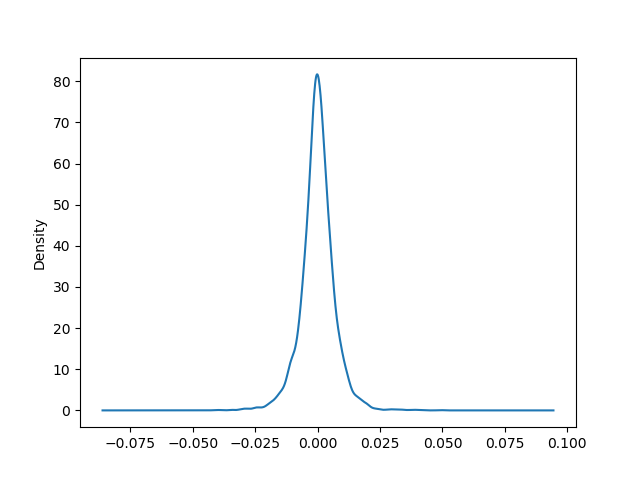

In [7]:
%matplotlib nbagg
d['delta'].plot.kde()

In [8]:
import numpy as np
as_strided = np.lib.stride_tricks.as_strided
ln=d['delta'].values
win = 5
v = as_strided(ln, (len(d) - (win - 1), win), (ln.strides * 2))
wn=pd.DataFrame(v,columns=['d1','d2','d3','d4','d5'])
wn

,d1,d2,d3,d4,d5
0,0.00000,0.00620,0.00620,0.00130,-0.00830
1,0.00620,0.00620,0.00130,-0.00830,-0.00270
2,0.00620,0.00130,-0.00830,-0.00270,0.00360
3,0.00130,-0.00830,-0.00270,0.00360,0.00290
4,-0.00830,-0.00270,0.00360,0.00290,-0.00540
...,...,...,...,...,...
5162,-0.00362,-0.00123,-0.00045,-0.00183,0.00071
5163,-0.00123,-0.00045,-0.00183,0.00071,0.00294
5164,-0.00045,-0.00183,0.00071,0.00294,0.00332
5165,-0.00183,0.00071,0.00294,0.00332,-0.00061


In [9]:
from Bayesian import *

In [11]:
x=wn['d1']
y=wn['d2']
data=np.array([x,y])
robust_model = analyze_robust(data)
with robust_model:
    step = pm.Metropolis()
    robust_trace = pm.sample(2000, tune=500, step=pm.NUTS(), chains=1, init='nuts')

print(pm.summary(robust_trace))

C:\Users\rando\Anaconda3\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
C:\Users\rando\Anaconda3\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
C:\Users\rando\Anaconda3\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array

                      mean            sd      mc_error       hpd_2.5  \
mu__0        -9.999997e+01  4.037228e-05  4.011157e-06 -1.000000e+02   
mu__1         9.999917e+01  5.786070e-04  5.754947e-05  9.999813e+01   
sigma__0      9.997864e-04  2.306228e-07  1.748288e-08  9.993045e-04   
sigma__1      9.996403e-04  5.193701e-08  5.109499e-09  9.995261e-04   
r            -2.143978e-01  5.045665e-06  5.015930e-07 -2.144056e-01   
cov__0_0      9.995729e-07  4.610431e-10  3.495052e-11  9.986095e-07   
cov__0_1     -2.142749e-07  5.347984e-11  4.272408e-12 -2.143502e-07   
cov__1_0     -2.142749e-07  5.347984e-11  4.272408e-12 -2.143502e-07   
cov__1_1      9.992807e-07  1.038359e-10  1.021525e-11  9.990525e-07   
nu_minus_one  9.999989e-01  3.660458e-07  3.634271e-08  9.999984e-01   
nu            1.999999e+00  3.660458e-07  3.634271e-08  1.999998e+00   

                  hpd_97.5  
mu__0        -9.999992e+01  
mu__1         9.999998e+01  
sigma__0      9.999998e-04  
sigma__1      9.997

<IPython.core.display.Javascript object>


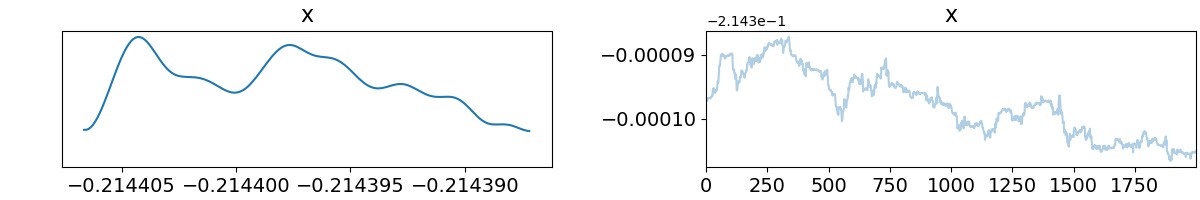

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000153C6E43848>,
      dtype=object)

In [12]:
pm.traceplot(robust_trace['r'])

C:\Users\rando\Anaconda3\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x


<IPython.core.display.Javascript object>


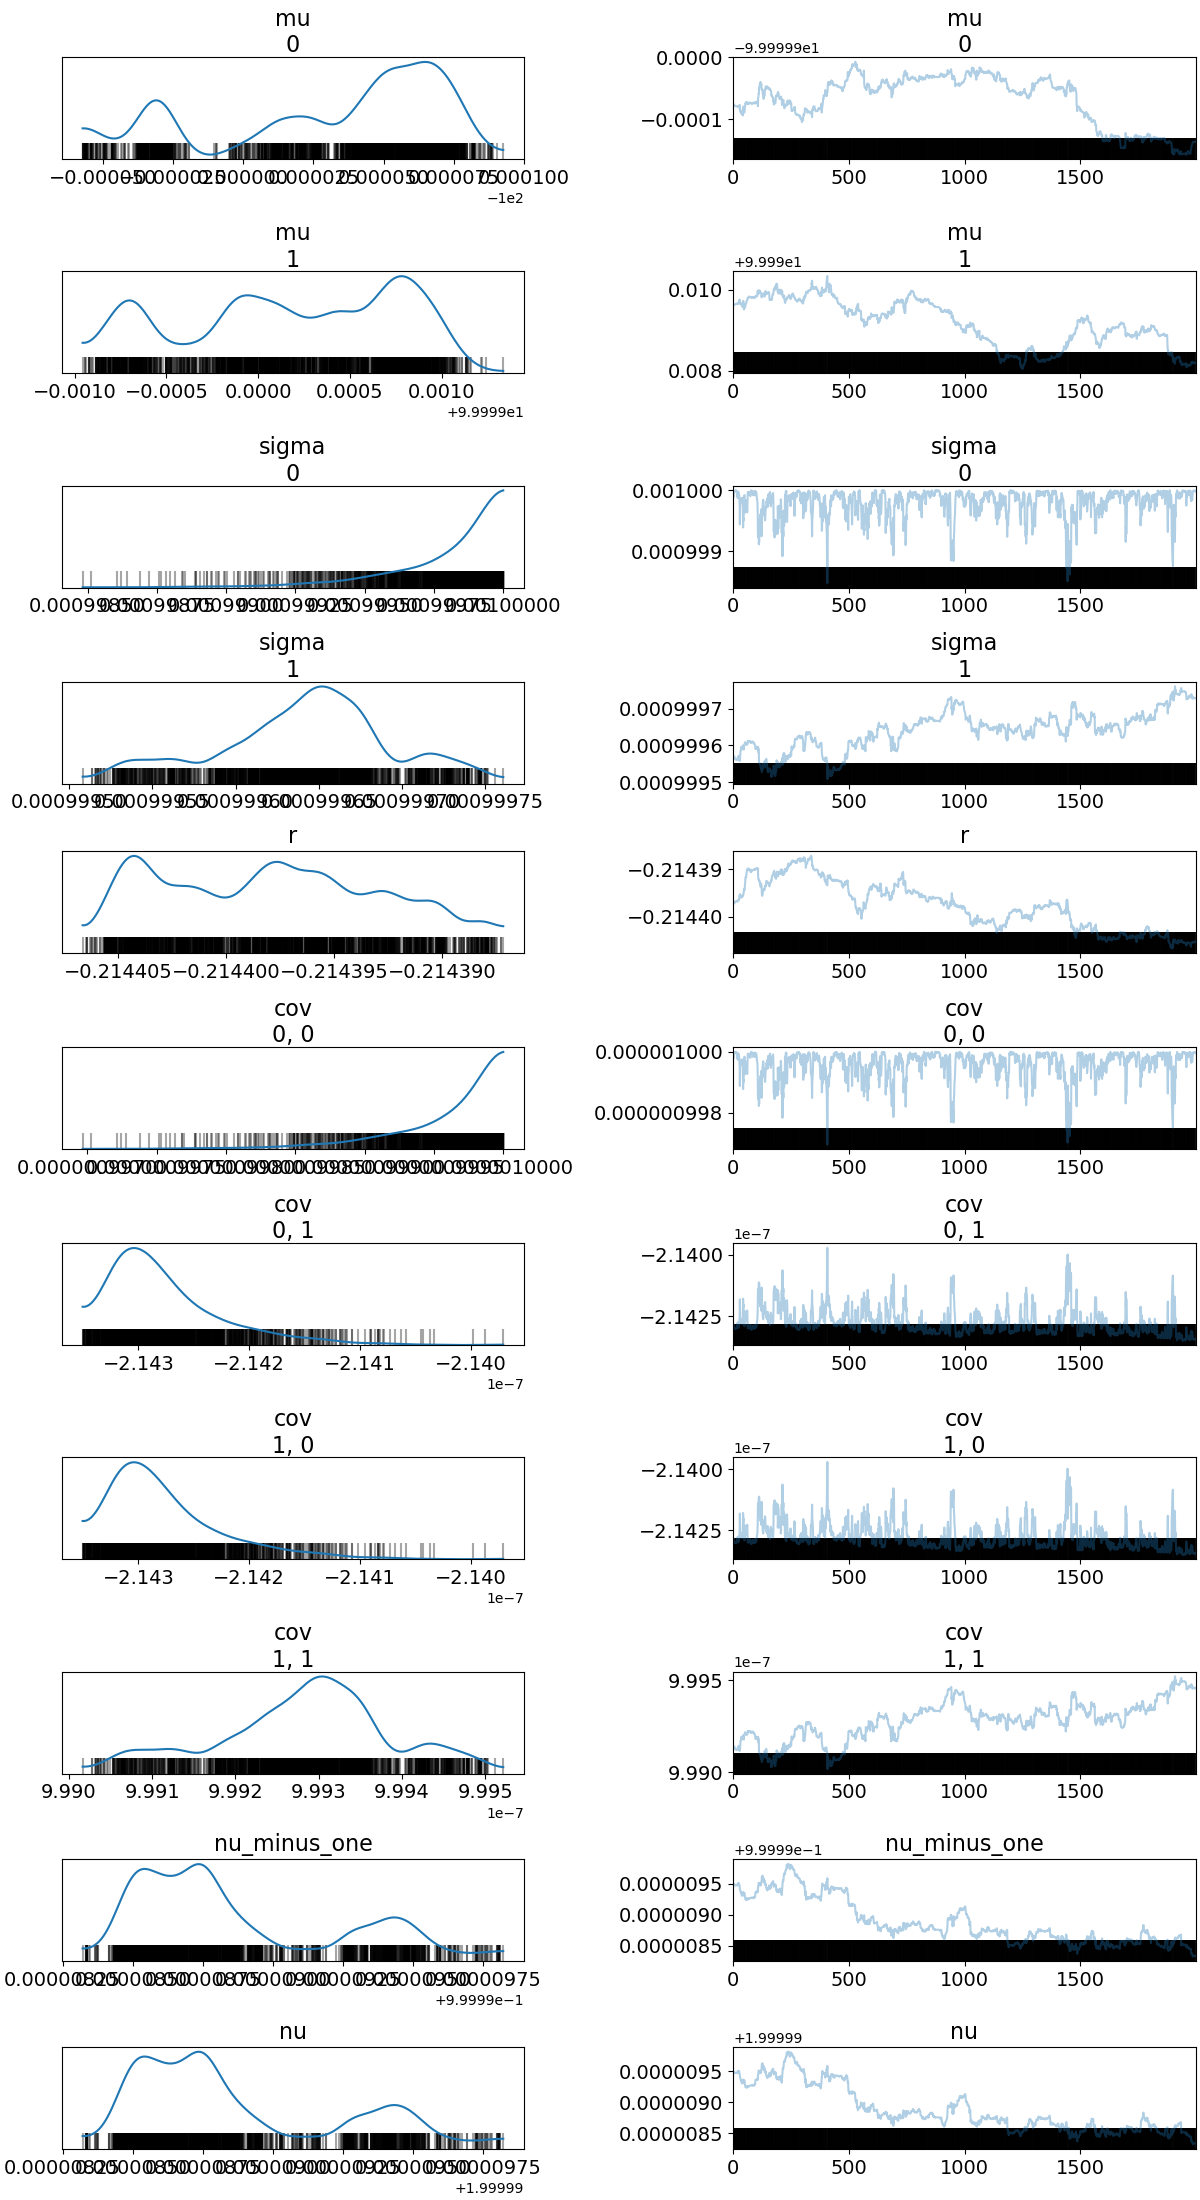

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000153C6B063C8>,
      dtype=object)

In [13]:
pm.traceplot(robust_trace)

In [14]:
from Bayesian1 import *

In [15]:
data1=wn.iloc[:,0:2].values
robust_model = analyze_robust1(data1)
with robust_model:
    step = pm.Metropolis()
    robust_trace = pm.sample(2000, tune=500, step=pm.NUTS(), chains=1, init='nuts')

print(pm.summary(robust_trace))

C:\Users\rando\Anaconda3\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
C:\Users\rando\Anaconda3\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result[diagonal_slice] = x
C:\Users\rando\Anaconda3\lib\site-packages\theano\tensor\basic.py:6611: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array

              mean            sd      mc_error   hpd_2.5  hpd_97.5
mu__0     0.000147  7.997430e-05  1.743811e-06 -0.000004  0.000313
mu__1     0.000034  7.654364e-05  1.564437e-06 -0.000114  0.000180
sigma__0  0.004900  7.464639e-05  1.889131e-06  0.004758  0.005050
sigma__1  0.004901  7.538876e-05  1.868252e-06  0.004759  0.005049
r         0.110674  1.504399e-02  3.160481e-04  0.084416  0.143464
cov__0_0  0.000024  7.320039e-07  1.851945e-08  0.000023  0.000025
cov__0_1  0.000003  3.732108e-07  8.058605e-09  0.000002  0.000003
cov__1_0  0.000003  3.732108e-07  8.058605e-09  0.000002  0.000003
cov__1_1  0.000024  7.393071e-07  1.833375e-08  0.000023  0.000025
nu        3.886717  1.636378e-01  4.456894e-03  3.535332  4.175149


<IPython.core.display.Javascript object>


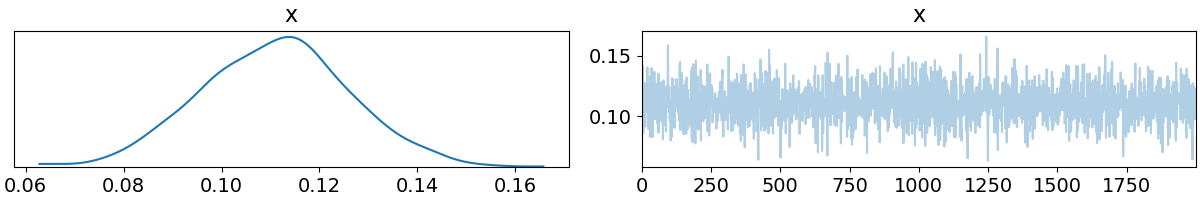

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000153C726D4C8>,
      dtype=object)

In [16]:
pm.traceplot(robust_trace['r'])